In [4]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import keras_tuner as kt

2024-08-04 17:55:04.754154: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-08-04 17:55:04.771873: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-08-04 17:55:04.777035: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1452] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-08-04 17:55:04.790303: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-08-04 17:55:05.845856: W tensorflow/compiler/tf2

In [4]:
from sklearn.model_selection import train_test_split

fashion_mnist = tf.keras.datasets.fashion_mnist.load_data()


In [5]:
(x,y),(x_test,y_test)=fashion_mnist
x_train=x[5000:]
y_train=y[5000:]
x_cv=x[:5000]
y_cv=y[:5000]

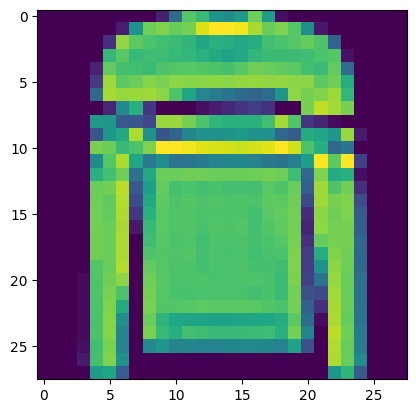

In [4]:
plt.imshow(x_cv[5])

In [6]:
x_test,x_train,x_cv=x_test/255,x_train/255,x_cv/255

In [10]:
x_test.shape

(10000, 28, 28)

In [5]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [7]:
class_names[y_train[0]]

'Coat'

In [13]:
tf.keras.utils.set_random_seed(42)
model=tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=[28,28]))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(300,activation='relu'))
model.add(tf.keras.layers.Dense(100,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

2024-08-03 17:03:30.206495: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:135] retrieving CUDA diagnostic information for host: nixos
2024-08-03 17:03:30.206569: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:142] hostname: nixos
2024-08-03 17:03:30.206794: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:166] libcuda reported version is: NOT_FOUND: was unable to find libcuda.so DSO loaded into this program
2024-08-03 17:03:30.206844: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:170] kernel reported version is: 550.78.0


In [14]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 300)            │       235,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 100)            │        30,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │         1,010 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 266,610 (1.02 MB)

 Trainable params: 266,610 (1.02 MB)

 Non-trainable params: 0 (0.00 B)

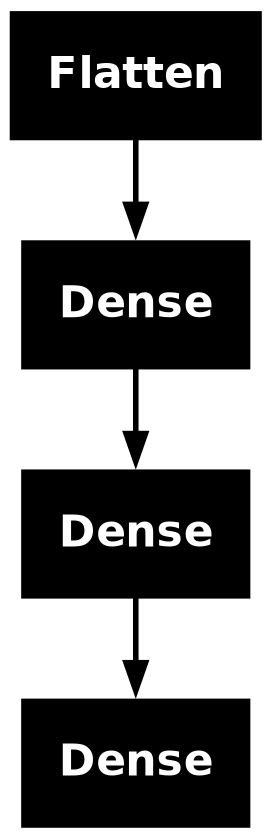

In [15]:
tf.keras.utils.plot_model(model)

In [16]:
l1=model.layers[1]
model.layers

[<Flatten name=flatten, built=True>,
 <Dense name=dense, built=True>,
 <Dense name=dense_1, built=True>,
 <Dense name=dense_2, built=True>]

In [14]:
weighs,bias=l1.get_weights()
weighs.shape

(784, 300)

In [15]:
model.compile(loss="sparse_categorical_crossentropy",
            optimizer="sgd",
             metrics=['accuracy'])

In [16]:
model

<Sequential name=sequential, built=True>

In [17]:
hist=model.fit(x_train,y_train,epochs=30,validation_data=(x_cv,y_cv))

Epoch 1/30


2024-08-03 16:50:58.098043: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 172480000 exceeds 10% of free system memory.


1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6804 - loss: 1.0147 - val_accuracy: 0.8266 - val_loss: 0.5118
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8239 - loss: 0.5045 - val_accuracy: 0.8484 - val_loss: 0.4483
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8424 - loss: 0.4489 - val_accuracy: 0.8568 - val_loss: 0.4156
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8516 - loss: 0.4175 - val_accuracy: 0.8630 - val_loss: 0.3951
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8588 - loss: 0.3956 - val_accuracy: 0.8662 - val_loss: 0.3808
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8638 - loss: 0.3788 - val_accuracy: 0.8698 - val_loss: 0.3686
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8696 - loss: 0.3651 - val_accuracy: 0.8722 - val_loss: 0.3584
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8734 - loss: 0.3532 - val_accurac

<Axes: >

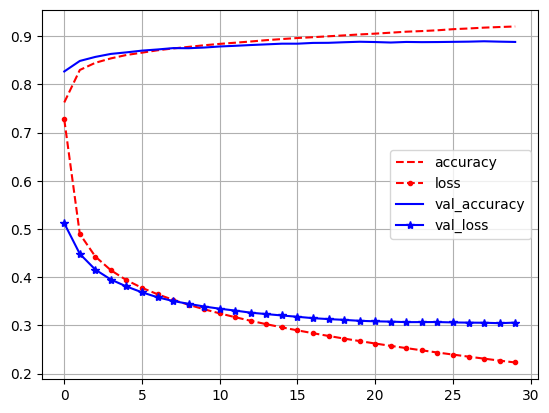

In [18]:
df=pd.DataFrame(hist.history)
df.plot(grid=True,style=["r--", "r--.", "b-", "b-*"])

In [19]:
x_new=x_test[:3]
pred=model.predict(x_new)
pred.round(2)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.02, 0.  , 0.02, 0.  , 0.95],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [5]:
from pathlib import Path
from time import strftime
def get_logdir(dir='my_logs'):
    return Path(dir)/strftime('run_%Y_%m_%d_%H_%M_%S')
get_logdir()

PosixPath('my_logs/run_2024_08_04_17_55_10')

In [6]:
der=get_logdir()
board=tf.keras.callbacks.TensorBoard(der,profile_batch=(100,200))

2024-08-04 17:55:11.875722: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:103] Profiler session initializing.
2024-08-04 17:55:11.875802: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:118] Profiler session started.
2024-08-04 17:55:11.876840: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:130] Profiler session tear down.


In [22]:
ealry_stoping=tf.keras.callbacks.EarlyStopping(patience=10,restore_best_weights=True)

In [23]:
hist=model.fit(x_train,y_train,epochs=30,validation_data=(x_cv,y_cv),callbacks=[ealry_stoping,board])

Epoch 1/30
   1/1719 ━━━━━━━━━━━━━━━━━━━━ 2:31 88ms/step - accuracy: 0.9375 - loss: 0.2662

2024-08-03 16:53:00.326937: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 172480000 exceeds 10% of free system memory.


 139/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9240 - loss: 0.2226

2024-08-03 16:53:00.819329: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:103] Profiler session initializing.
2024-08-03 16:53:00.819378: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:118] Profiler session started.


 241/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9232 - loss: 0.2232

2024-08-03 16:53:01.211273: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:68] Profiler session collecting data.
2024-08-03 16:53:01.272271: I external/local_tsl/tsl/profiler/lib/profiler_session.cc:130] Profiler session tear down.
2024-08-03 16:53:01.275444: I external/local_tsl/tsl/profiler/rpc/client/save_profile.cc:147] Collecting XSpace to repository: my_logs/run_2024_08_03_16_52_59/plugins/profile/2024_08_03_16_53_01/nixos.xplane.pb


1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9209 - loss: 0.2218 - val_accuracy: 0.8882 - val_loss: 0.3049
Epoch 2/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9221 - loss: 0.2180 - val_accuracy: 0.8884 - val_loss: 0.3057
Epoch 3/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9239 - loss: 0.2142 - val_accuracy: 0.8890 - val_loss: 0.3054
Epoch 4/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9255 - loss: 0.2104 - val_accuracy: 0.8892 - val_loss: 0.3056
Epoch 5/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9269 - loss: 0.2071 - val_accuracy: 0.8898 - val_loss: 0.3055
Epoch 6/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9283 - loss: 0.2036 - val_accuracy: 0.8902 - val_loss: 0.3061
Epoch 7/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9295 - loss: 0.2004 - val_accuracy: 0.8896 - val_loss: 0.3058
Epoch 8/30
1719/1719 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.9305 - loss: 0.1973 - val_accurac

In [24]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs

Reusing TensorBoard on port 6006 (pid 129612), started 21:22:19 ago. (Use '!kill 129612' to kill it.)

In [8]:
test_logdir = get_logdir()
writer = tf.summary.create_file_writer(str(test_logdir))
with writer.as_default():
    for step in range(1, 1000 + 1):
        tf.summary.scalar("my_scalar", np.sin(step / 10), step=step)
        
        data = (np.random.randn(100) + 2) * step / 100 # gets larger
        tf.summary.histogram("my_hist", data, buckets=50, step=step)
        
        images = np.random.rand(2, 32, 32, 3) * step / 1000 # gets brighter
        tf.summary.image("my_images", images, step=step)
        
        texts = ["The step is " + str(step), "Its square is " + str(step ** 2)]
        tf.summary.text("my_text", texts, step=step)
        
        sine_wave = tf.math.sin(tf.range(12000) / 48000 * 2 * np.pi * step)
        audio = tf.reshape(tf.cast(sine_wave, tf.float32), [1, -1, 1])
        tf.summary.audio("my_audio", audio, sample_rate=48000, step=step)

2024-08-03 21:33:26.502906: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:135] retrieving CUDA diagnostic information for host: nixos
2024-08-03 21:33:26.502968: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:142] hostname: nixos
2024-08-03 21:33:26.503247: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:166] libcuda reported version is: NOT_FOUND: was unable to find libcuda.so DSO loaded into this program
2024-08-03 21:33:26.503354: I external/local_xla/xla/stream_executor/cuda/cuda_diagnostics.cc:170] kernel reported version is: 550.78.0


KeyboardInterrupt: 

In [7]:
import keras_tuner as kt

In [9]:
def build_model(hp):
    n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
    n_neurons = hp.Int('n_neurons',min_value=8,max_value=256)
    learning_rate = hp.Float('learning_rate',min_value=1e-4,max_value=1e-2,sampling='log')

    optimizer = hp.Choice("optimizer", values=["sgd", "adam"])
    if optimizer == "sgd":
        optimizer=tf.keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate)
    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten())
    for _ in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons,activation='relu'))
    model.add(tf.keras.layers.Dense(10,activation='softmax'))
    model.compile(loss='sparse_categorical_crossentropy',optimizer=optimizer,metrics=['accuracy'])

    return model

In [8]:
random_search=kt.RandomSearch(build_model,objective='val_accuracy',max_trials=5,
                              overwrite=True, directory="my_fashion_mnist", project_name="my_rnd_search", seed=42)

random_search.search(x_train,y_train,epochs=10,validation_data=(x_cv,y_cv))

Trial 5 Complete [00h 00m 32s]
val_accuracy: 0.7523999810218811

Best val_accuracy So Far: 0.8654000163078308
Total elapsed time: 00h 03m 01s


In [9]:
best=random_search.get_best_models(3)
best[0]

/home/zew/Projects/main/.venv/lib/python3.12/site-packages/keras/src/saving/saving_lib.py:576: UserWarning: Skipping variable loading for optimizer 'adam', because it has 2 variables whereas the saved optimizer has 22 variables. 
  saveable.load_own_variables(weights_store.get(inner_path))


<Sequential name=sequential, built=True>

In [10]:
besth=random_search.get_best_hyperparameters(3)
besth[0].values

{'n_hidden': 8,
 'n_neurons': 30,
 'learning_rate': 0.008547485565344062,
 'optimizer': 'sgd'}

In [11]:
best_trial=random_search.oracle.get_best_trials(1)[0]
best_trial.summary()

Trial 3 summary
Hyperparameters:
n_hidden: 8
n_neurons: 30
learning_rate: 0.008547485565344062
optimizer: sgd
Score: 0.8654000163078308


In [32]:
best_trial.metrics.get_last_value('val_accuracy')

0.8614000082015991

In [33]:
best[0].fit(x,y,epochs=20)
test_loss,test_accuracy=best[0].evaluate(x_test,y_test)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4210 - loss: 6.0611
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.3001 - loss: 2.0936
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1529 - loss: 2.2576
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1697 - loss: 2.1250
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1360 - loss: 2.2240
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1347 - loss: 2.2246
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1346 - loss: 2.2246
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1345 - loss: 2.2247
Epoch 9/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1346 - loss: 2.2248
Epoch 10/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1348 - loss: 2.2248
Epoch 11/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.1347 - loss: 2.2248
Epoch 12/20
1875/1875 ━━━━━━━━

In [34]:
test_accuracy

0.13750000298023224

In [10]:
class MyKerasClass (kt.HyperModel):
    def build(self,hp):
        return build_model(hp)
    def fit (self,hp,model,X,y,**kwargs):
        if hp.Boolean('normalization') == True:
            norm=tf.keras.layers.Normalization()
            X = norm(X)
        return model.fit(X,y,**kwargs)

In [11]:
from pathlib import Path
another_tuner = kt.Hyperband(
    MyKerasClass(),objective='val_accuracy',seed=42,max_epochs=10,factor=3,hyperband_iterations=2,
    overwrite=True, directory="my_fashion_mnist", project_name="hyperband"
)
root_logdir=Path(another_tuner.project_dir) / "tensorboard"
tensorboard_cb = tf.keras.callbacks.TensorBoard(root_logdir)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=2)

another_tuner.search(x_train,y_train,epochs=10,validation_data=(x_cv,y_cv),callbacks=[early_stopping_cb,tensorboard_cb])

Trial 60 Complete [00h 00m 41s]
val_accuracy: 0.8501999974250793

Best val_accuracy So Far: 0.8948000073432922
Total elapsed time: 00h 18m 25s


In [19]:
h=another_tuner.get_best_hyperparameters(1)
h[0].values

{'n_hidden': 2,
 'n_neurons': 251,
 'learning_rate': 0.001715074355925934,
 'optimizer': 'adam',
 'normalization': False,
 'tuner/epochs': 10,
 'tuner/initial_epoch': 4,
 'tuner/bracket': 2,
 'tuner/round': 2,
 'tuner/trial_id': '0013'}